## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datasets/train_clean.csv')
df_test = pd.read_csv('../datasets/test_clean.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

#allows me to scroll (Credit to Andy)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [4]:
df.corr()['saleprice'].sort_values(ascending = False)

saleprice            1.000000
overall_qual         0.803462
neighborhood_rank    0.720388
gr_liv_area          0.719463
exter_qual           0.715048
kitchen_qual         0.694295
total_bsmt_sf        0.665116
garage_area          0.655452
garage_cars          0.648574
1st_flr_sf           0.648252
bsmt_qual            0.613236
year_built           0.572405
year_remod/add       0.550872
fireplace_qu         0.539484
full_bath            0.538225
mas_vnr_area         0.511273
totrms_abvgrd        0.509775
fireplaces           0.473783
heating_qc           0.458636
bsmtfin_sf_1         0.446103
open_porch_sf        0.338545
lot_frontage         0.338280
wood_deck_sf         0.327629
lot_area             0.303744
garage_qual          0.285328
bsmt_full_bath       0.284433
half_bath            0.283372
garage_cond          0.265066
garage_yr_blt        0.258697
2nd_flr_sf           0.248826
bsmt_cond            0.225096
condition_1          0.205527
bsmt_unf_sf          0.190883
bedroom_ab

<AxesSubplot:>

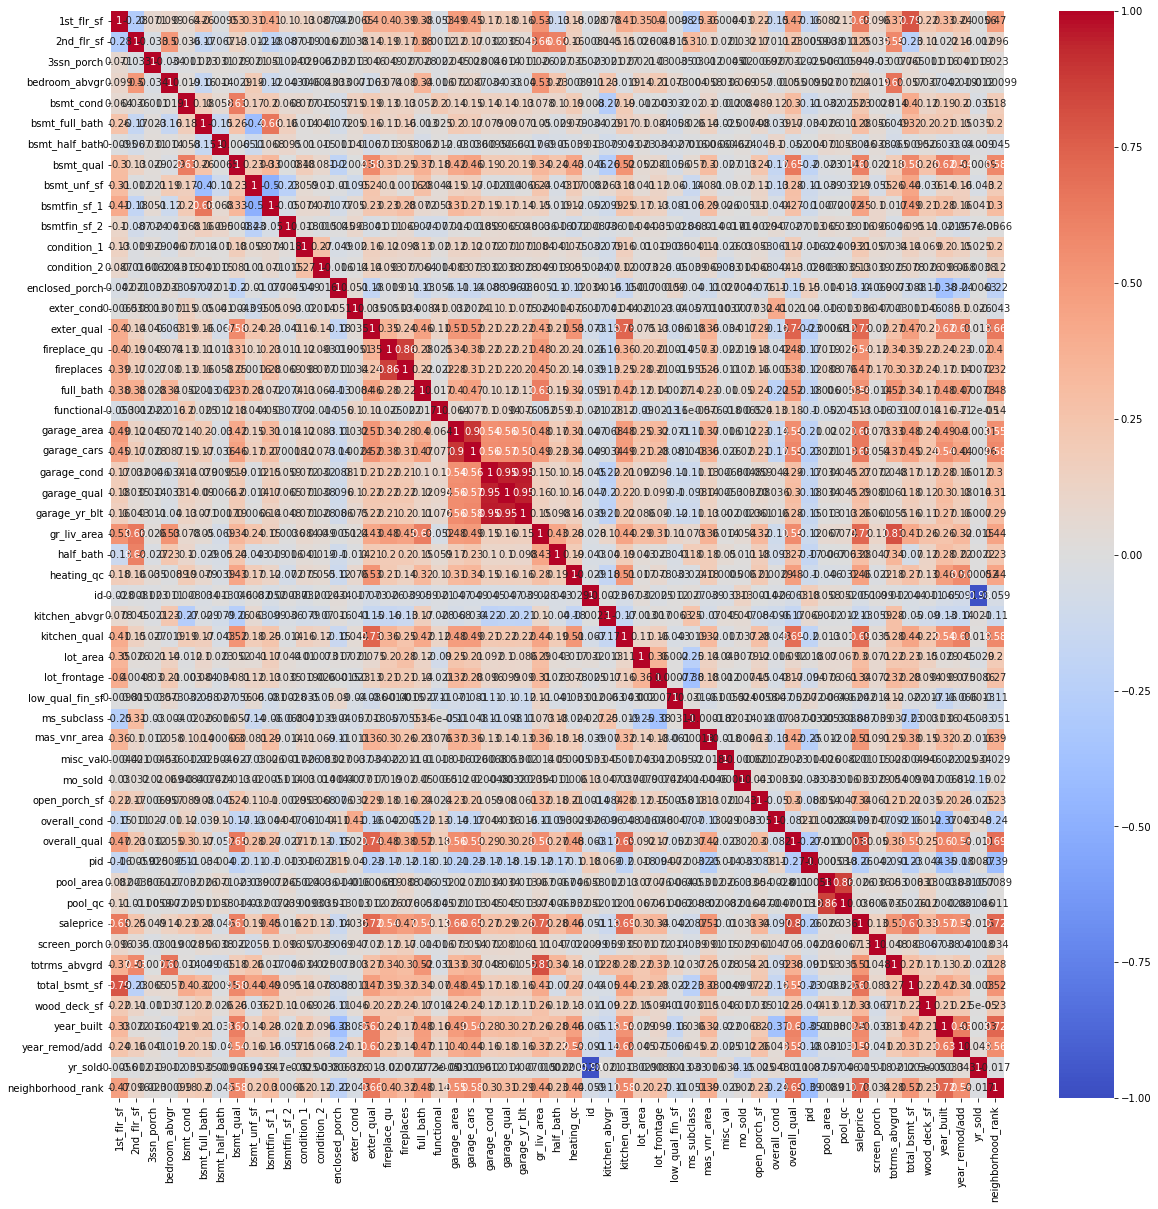

In [5]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

This is very difficult to read but I wanted to see if there were any features that a correlation of 1, other than the diagonal. While there are no r = 1, there are some combinations with garage_yr_blt, garage_qual, and garage_cond. Similarly, there is an association between garage_area and garage_cars, pool_qual and pool_area, and also fireplaces and fireplace_qu.

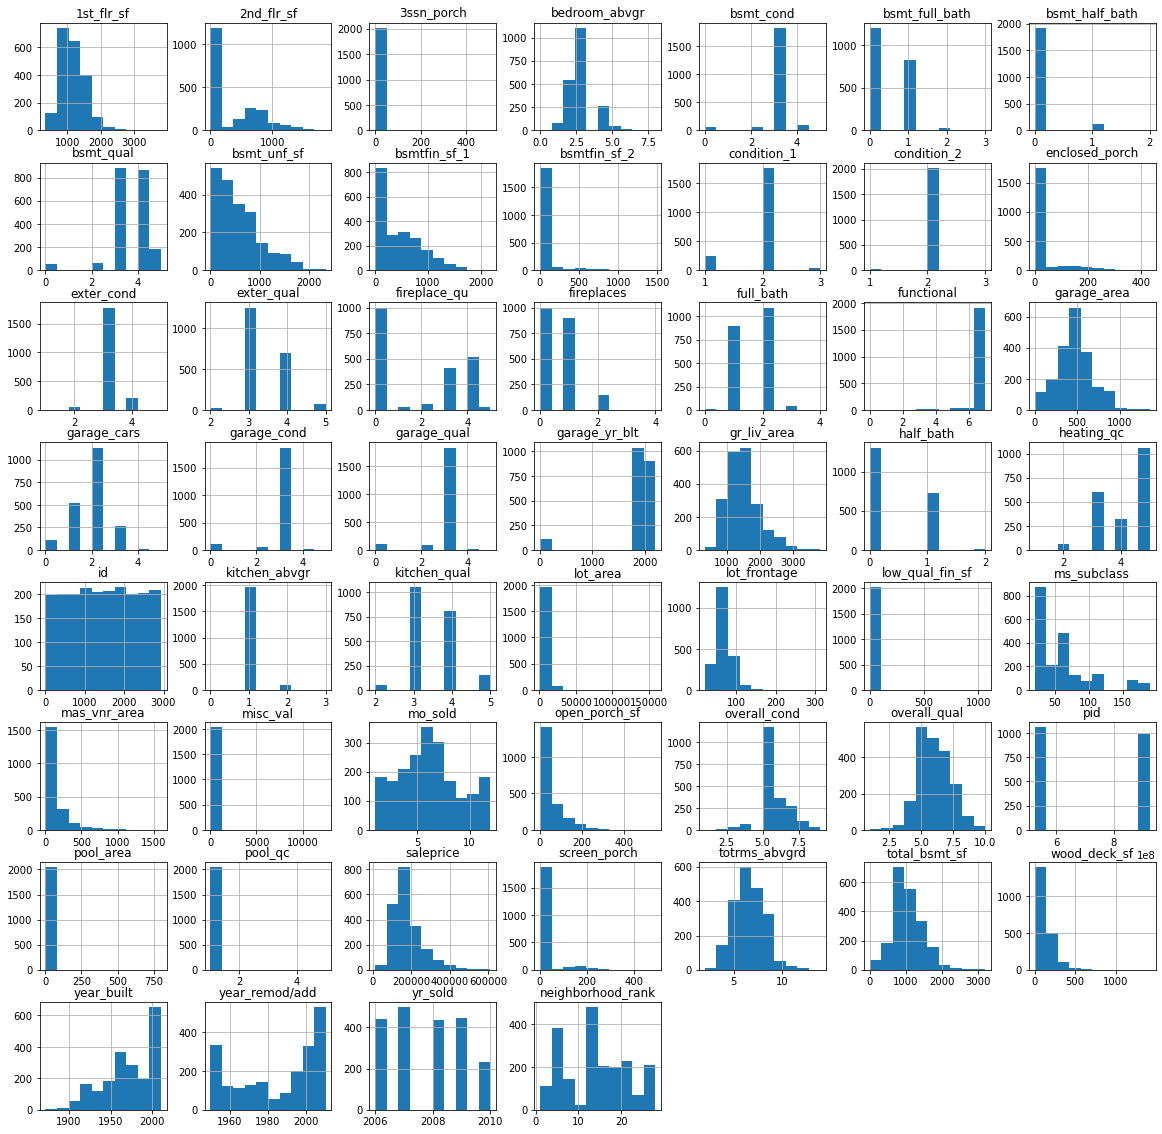

In [6]:
df.hist(figsize = (20, 20));

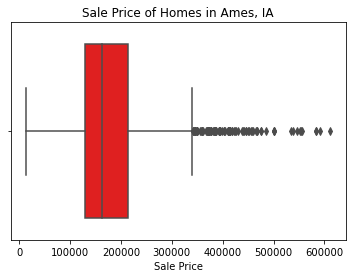

In [7]:
sns.boxplot(x=df['saleprice'], color='r')
plt.title('Sale Price of Homes in Ames, IA')
plt.xlabel('Sale Price');

The Sale Price of the homes is heavily skewed to the right due to many outliers. When doing a linear regression model, it will be helpful to complete a log transformation of the sale price while fitting a model. 

In [8]:
num_cols = list(df._get_numeric_data().drop(columns = ['id','pid']))

#Used this list to create the pairplots below of only numerica columns exclusing the id and pid

In [9]:
df.describe()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,bedroom_abvgr,bsmt_cond,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,condition_1,condition_2,enclosed_porch,exter_cond,exter_qual,fireplace_qu,fireplaces,full_bath,functional,garage_area,garage_cars,garage_cond,garage_qual,garage_yr_blt,gr_liv_area,half_bath,heating_qc,id,kitchen_abvgr,kitchen_qual,lot_area,lot_frontage,low_qual_fin_sf,ms_subclass,mas_vnr_area,misc_val,mo_sold,open_porch_sf,overall_cond,overall_qual,pid,pool_area,pool_qc,saleprice,screen_porch,totrms_abvgrd,total_bsmt_sf,wood_deck_sf,year_built,year_remod/add,yr_sold,neighborhood_rank
count,2049.000000,2049.00000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2.049000e+03,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1160.848219,329.18692,2.593948,2.843826,2.929234,0.426061,0.062958,3.488531,567.248414,437.804783,47.982430,1.899951,1.993167,22.593948,3.085896,3.404588,1.761347,0.589068,1.576867,6.842850,472.881894,1.775988,2.810151,2.802831,1868.590044,1495.553441,0.370425,4.157638,1473.676428,1.042948,3.515861,10024.677892,68.737433,5.518302,57.025378,97.736945,43.327965,6.220595,47.224500,5.562714,6.108346,7.134001e+08,2.165935,1.009273,181479.018058,16.527574,6.428990,1053.035627,93.554417,1971.673499,1984.166423,2007.775988,14.045388
std,379.066122,425.59571,25.241801,0.826804,0.572284,0.521533,0.250856,0.900841,445.087498,439.842668,165.037776,0.358007,0.112466,59.870165,0.372965,0.586134,1.806604,0.635842,0.549389,0.683725,214.449226,0.764246,0.716419,0.721579,454.334478,485.783577,0.500901,0.964224,844.248064,0.209888,0.664287,6608.511749,20.584676,51.093509,42.837269,171.936400,434.481342,2.742380,65.857797,1.104897,1.421780,1.886859e+08,36.297124,0.160602,79295.913255,57.399890,1.544572,426.814420,128.195671,30.171293,21.032785,1.312533,7.424844
min,334.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.263011e+08,0.000000,1.000000,12789.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000,1.000000
25%,879.000000,0.00000,0.000000,2.000000,3.000000,0.000000,0.000000,3.000000,220.000000,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,7.000000,319.000000,1.000000,3.000000,3.000000,1957.000000,1128.000000,0.000000,3.000000,753.000000,1.000000,3.000000,7500.000000,60.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,5.284581e+08,0.000000,1.000000,129800.000000,0.000000,5.000000,793.000000,0.000000,1953.000000,1964.000000,2007.000000,7.000000
50%,1092.000000,0.00000,0.000000,3.000000,3.000000,0.000000,0.000000,4.000000,474.000000,368.000000,0.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,7.000000,480.000000,2.000000,3.000000,3.000000,1978.000000,1444.000000,0.000000,5.000000,1481.000000,1.000000,3.000000,9405.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,5.354532e+08,0.000000,1.000000,162500.000000,0.000000,6.000000,994.000000,0.000000,1974.000000,1993.000000,2008.000000,13.000000
75%,1404.000000,691.00000,0.000000,3.000000,3.000000,1.000000,0.000000,4.000000,811.000000,733.000000,0.000000,2.000000,





Because seaborn's pairplot does not output as a gird, I am looking at the features 5 at a time below and comparing to Sale Price. 

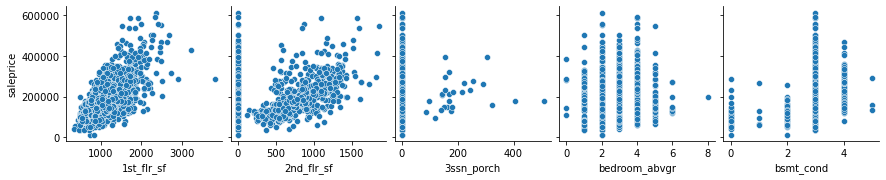

In [8]:
sns.pairplot(df, x_vars = ['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'bedroom_abvgr', 'bsmt_cond'] , y_vars = ['saleprice'])


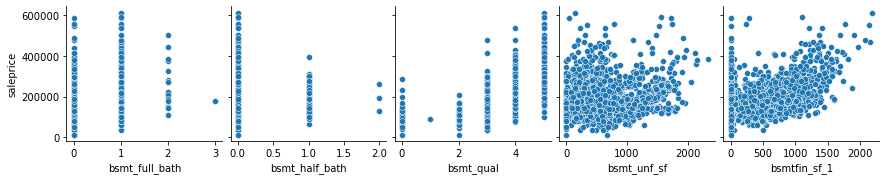

In [9]:
sns.pairplot(df, x_vars = ['bsmt_full_bath', 'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1'], y_vars = ['saleprice'])

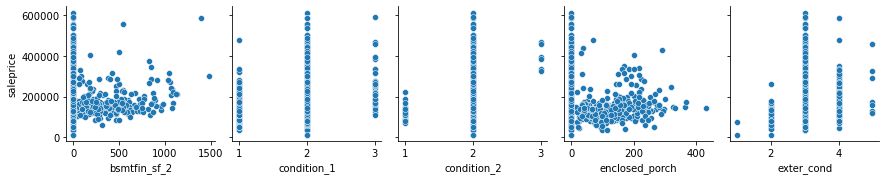

In [10]:
sns.pairplot(df, x_vars = ['bsmtfin_sf_2', 'condition_1', 'condition_2', 'enclosed_porch', 'exter_cond'] , y_vars = ['saleprice'])

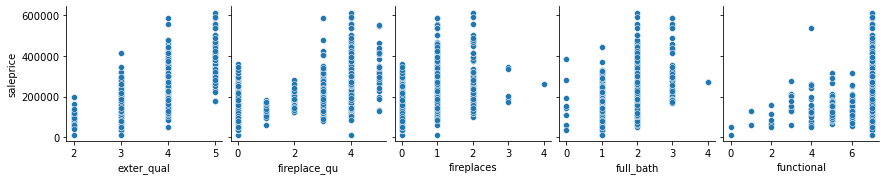

In [11]:
sns.pairplot(df, x_vars = ['exter_qual', 'fireplace_qu', 'fireplaces', 'full_bath', 'functional'] , y_vars = ['saleprice'])

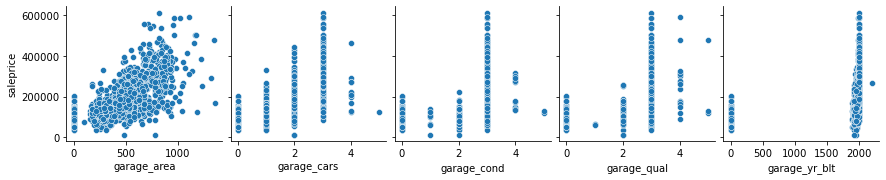

In [12]:
sns.pairplot(df, x_vars = ['garage_area', 'garage_cars', 'garage_cond', 'garage_qual', 'garage_yr_blt'] , y_vars = ['saleprice'])

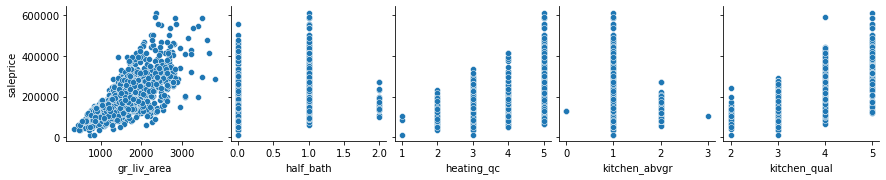

In [13]:
sns.pairplot(df, x_vars = ['gr_liv_area', 'half_bath', 'heating_qc', 'kitchen_abvgr', 'kitchen_qual'] , y_vars = ['saleprice'])

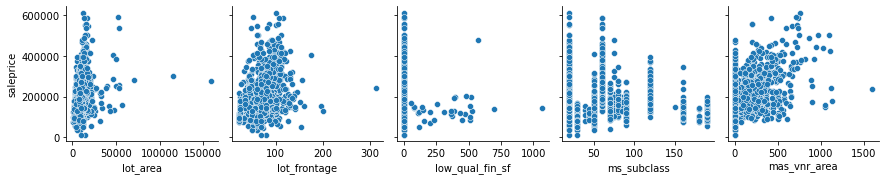

In [14]:
sns.pairplot(df, x_vars = ['lot_area', 'lot_frontage', 'low_qual_fin_sf', 'ms_subclass', 'mas_vnr_area'] , y_vars = ['saleprice'])

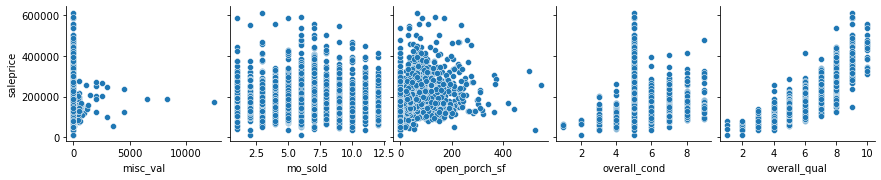

In [15]:
sns.pairplot(df, x_vars = ['misc_val', 'mo_sold', 'open_porch_sf', 'overall_cond', 'overall_qual'] , y_vars = ['saleprice'])

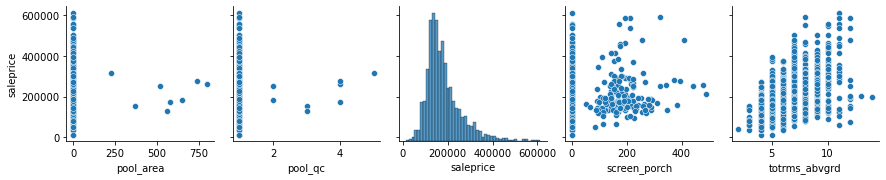

In [16]:
sns.pairplot(df, x_vars = ['pool_area', 'pool_qc', 'saleprice', 'screen_porch', 'totrms_abvgrd'] , y_vars = ['saleprice'])

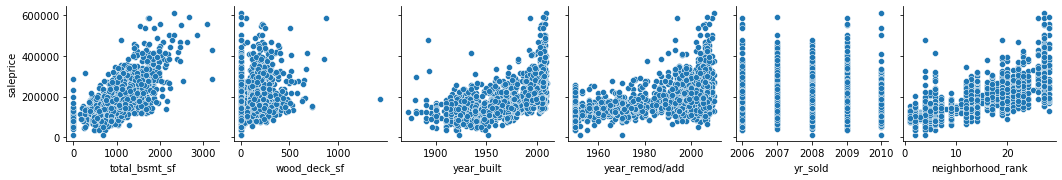

In [17]:
sns.pairplot(df, x_vars = ['total_bsmt_sf', 'wood_deck_sf', 'year_built', 'year_remod/add', 'yr_sold', 'neighborhood_rank'] , y_vars = ['saleprice'])

Biggest takeaways: 1st Flr Sqft, bsmt sqft, exterior quality, fireplaces, baths, garage area & cars, gr liv area, heating qc, kitchen qual, overall cond & Qual, total bsmt sf, year built, year remod/add and beighbordhood rank have somewhat linear associations. 

Sale Price is skewed, so that will need to be transformed via a power transformation. 


There are clear associations between some of these features and the sale price. I am confident that a model can be produce that will allow us to predict the sale price of a home.
___________

What outliers exist?

In [20]:
def outliers(col):
    quar1 = np.percentile(df[col], 25)
    quar3 = np.percentile(df[col], 75)
    iqr = quar3 - quar1
    lowerbound = quar1 - 1.5 * iqr
    upperbound = quar3 + 1.5 * iqr
    return f'Anything below {lowerbound} is an outlier. Anything above {upperbound} is an outlier.'

In [21]:
outliers('gr_liv_area')

'Anything below 228.0 is an outlier. Anything above 2628.0 is an outlier.'

In [22]:
#df[df['gr_liv_area'] > 2627.75]['gr_liv_area'].sort_values(ascending = False)


The two square footages on rows 960 and 1885 are far outliers and will be deleted from the cleaning file. This will only need to be done once and will not show up on this notebook after it has been done.